# 차원 축소

## import

In [235]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1. 데이터 준비

### (1) 데이터 이해

In [236]:
# breast_cancer 데이터 로딩
cancer=load_breast_cancer()
x = cancer.data
y = cancer.target

x = pd.DataFrame(x, columns=cancer.feature_names)

In [237]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [238]:
#x.info()

In [239]:
#x.describe().T

### (2) 스케일링

`-` 거리계산 기반 차원축소이므로 스케일링이 필요

### (3) 데이터 분할

In [240]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

## 2. 차원 축소 : 주성분 분석 PCA

### (1) 주성분 만들기

In [241]:
from sklearn.decomposition import PCA

In [242]:
# feature 수
x_train.shape[1]

30

In [243]:
# 주성분을 몇개로 할지 결정(최대값 : 전체 feature 수)
n = x_train.shape[1] ## 일단 원래 feature의 수만 지정

# 주성분 분석 선언
pca = PCA(n_components=n)

# 만들고, 적용하기
x_train_pc = pca.fit_transform(x_train)
x_val_pc = pca.transform(x_val)

`-` 편리한 사용을 위해 데이터프레임으로 변환

In [244]:
# 칼럼이름 생성
column_names = [ 'PC'+str(i+1) for i in range(n) ]
column_names[:5]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [245]:
# 데이터프레임으로 변환하기
x_train_pc = pd.DataFrame(x_train_pc, columns = column_names)
x_val_pc = pd.DataFrame(x_val_pc, columns = column_names)
x_train_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-34.932206,47.067779,-17.756611,-7.596006,1.342721,-1.956710,1.710276,0.641097,0.120917,0.139938,...,0.000962,0.010435,-0.003107,-0.002029,0.003974,-0.000625,-0.000576,-0.000446,0.000679,0.001145
1,830.092826,201.450565,-6.166167,-2.578986,-1.794260,2.619614,0.284543,0.366729,-0.027226,0.018051,...,-0.019489,0.001261,0.003305,-0.011163,0.005675,0.001333,0.001847,-0.003122,0.001580,0.000655
2,-546.384045,22.139574,17.780018,0.887465,-0.308381,-0.126655,-1.450590,-0.632612,-0.009378,-0.606726,...,0.002701,-0.014928,0.001773,0.001490,0.007249,-0.000604,-0.001318,-0.001299,-0.000982,-0.000077
3,653.345270,25.739603,30.832277,-7.437820,2.139092,3.686376,-0.111756,0.191535,-0.181315,0.111042,...,0.002200,0.021932,-0.012297,0.002943,0.002366,-0.005320,0.000484,0.000967,-0.002898,-0.000765
4,-422.567968,19.784995,6.432610,-10.383670,-14.675624,0.098355,-0.537767,-0.113981,0.062963,0.442519,...,0.003790,-0.012366,0.004250,0.005447,-0.002826,-0.000611,-0.000136,0.000270,-0.000225,0.000407


### (2) excercise.1 

`-` 주성분을 1,2,3개로 선언하고, `x_train`을 이용해서 주성분을 추출

In [246]:
# 주성분을 몇개로 할지 결정(최대값 : 전체 feature 수)
n = [1,2,3]## 일단 원래 feature의 수만 지정

# 주성분 분석 선언

for i in n : 
     exec(f"pca{i} = PCA(n_components={i})")
     exec(f"x_train_pc{i} = pca{i}.fit_transform(x_train)")

### (3) 주성분 누적 분산 그래프

* 그래프를 보고 적절한 주성분의 개수를 지정(elbow method!)
* x축 : PC 수
* y축 : 전체 분산크기 - 누적 분산크기

In [247]:
pca

PCA(n_components=30)

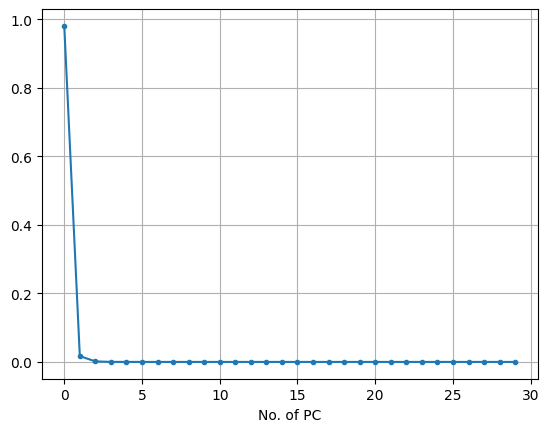

In [248]:
plt.plot(pca.explained_variance_ratio_, marker = '.')
plt.xlabel('No. of PC')
plt.grid()
plt.show()

### (4) 시각화

`-`  주성분 중 상위 2개를 뽑아 시각화

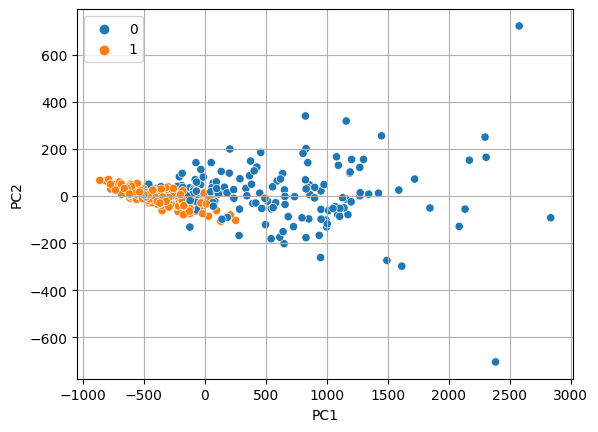

In [249]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_train_pc, hue = y_train)
plt.grid()
plt.show()

## 3. 지도학습으로 연계

### (1) 원본데이터로 모델 생성

In [250]:
model0 = KNeighborsClassifier()
model0.fit(x_train, y_train)

KNeighborsClassifier()

In [251]:
# 원본데이터 모델의 성능
pred0 = model0.predict(x_val)

print(confusion_matrix(y_val, pred0))
print(accuracy_score(y_val, pred0))
print(classification_report(y_val, pred0))

[[ 57   7]
 [  5 102]]
0.9298245614035088
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### (2) 주성분 상위 1개로 모델링

In [252]:
n = 1 
x_train_pc_n = x_train_pc[column_names[:n]] 
x_val_pc_n = x_val_pc[column_names[:n]] 
# 뽑은 데이터로 모델링 
model1 = KNeighborsClassifier() 
model1.fit(x_train_pc_n, y_train) # 예측 평가 
pred1 = model1.predict(x_val_pc_n) 
print(accuracy_score(y_val, pred1))

0.8830409356725146


### (3) 주성분 상위 2개로 모델링

In [253]:
n = 2 
x_train_pc_n = x_train_pc[column_names[:n]] 
x_val_pc_n = x_val_pc[column_names[:n]] 
# 뽑은 데이터로 모델링 
model1 = KNeighborsClassifier() 
model1.fit(x_train_pc_n, y_train) # 예측 평가 
pred1 = model1.predict(x_val_pc_n) 
print(accuracy_score(y_val, pred1))

0.9181286549707602


### (4) 주성분 상위 3개로 모델링

In [254]:
n = 3
x_train_pc_n = x_train_pc[column_names[:n]] 
x_val_pc_n = x_val_pc[column_names[:n]] 
# 뽑은 데이터로 모델링 
model1 = KNeighborsClassifier() 
model1.fit(x_train_pc_n, y_train) # 예측 평가 
pred1 = model1.predict(x_val_pc_n) 
print(accuracy_score(y_val, pred1))

0.9181286549707602


***

## 4. 차원축소 : t-SNE

`1`. 원본데이터의 유사도(거리) 맵을 만듬

`2`  원본에서의 유사도가 축소한 차원에서도 유지 되었으면 좋겠음

`3` 주성분 분석은 선형 축소, t-SNE는 비선형 축소이다.

### 실습

In [255]:
from sklearn.manifold import TSNE

In [256]:
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 사용의 편리함을 위해 DataFrame으로` 변환
x_tsne = pd.DataFrame(x_tsne, columns = ['T1','T2'])

In [257]:
x_tsne.shape

(569, 2)

`-` 시각화

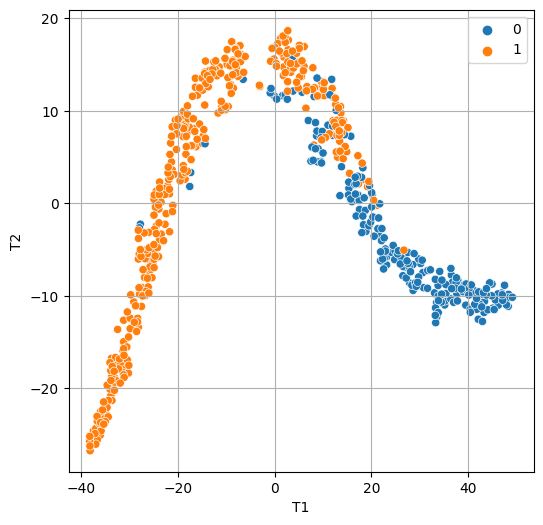

In [258]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()

### exercise. 2

#### a. 데이터 준비

In [259]:
digits = load_digits()
x = digits.data
y = digits.target

y = pd.Categorical(y)

In [260]:
x.shape

(1797, 64)

`-` 데이터 살펴보기

In [261]:
print(x[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


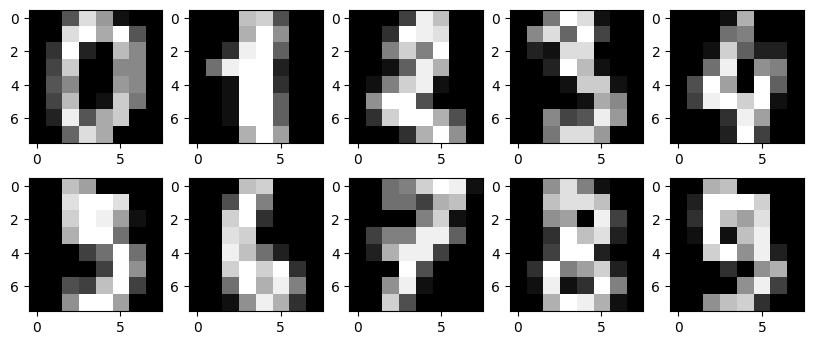

In [262]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap='gray');

* 스케일링

In [263]:
# 최대, 최소값
np.min(x), np.max(x)

(0.0, 16.0)

In [264]:
# 최대값으로 나누면 Min Max 스케일링이 됩니다.
x = x / 16

#### b. pca

`-` 주성분 2개로 차원을 축소하고 시각화

In [265]:
n = 2
pca = PCA(n_components = n)

x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])

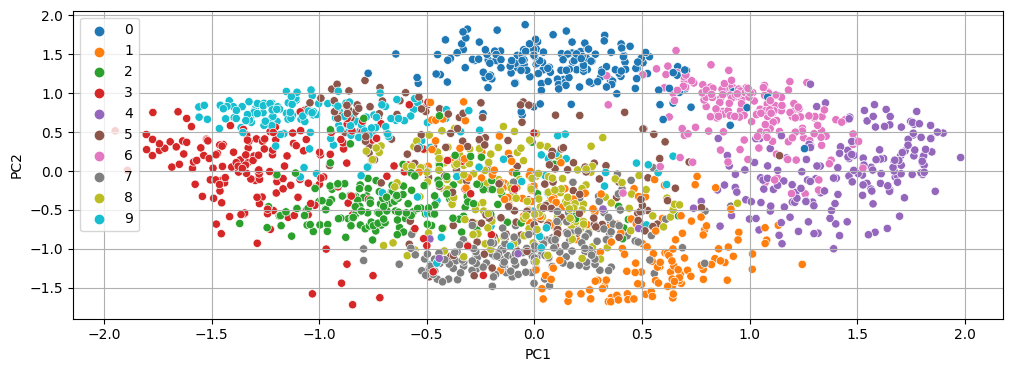

In [266]:
# 시각화
plt.figure(figsize=(12, 4))
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_pca, hue = y)
plt.grid()
plt.show()

#### c. tsne

In [267]:
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 사용의 편리함을 위해 DataFrame으로` 변환
x_tsne = pd.DataFrame(x_tsne, columns = ['T1','T2'])

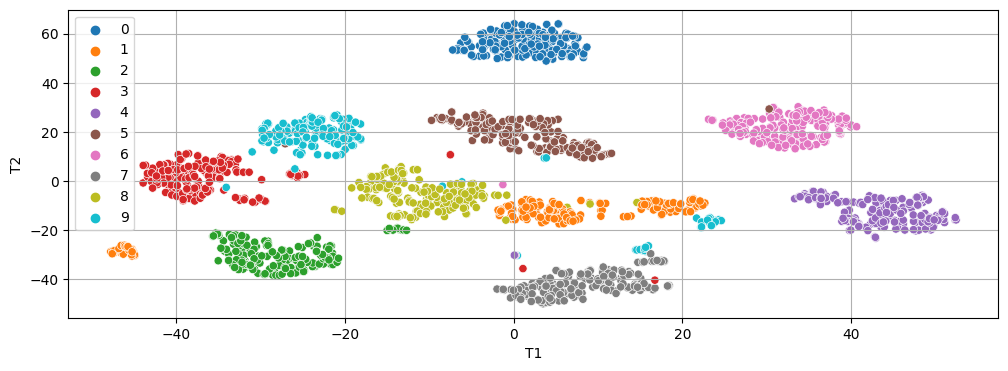

In [268]:
# 시각화
plt.figure(figsize=(12, 4))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()
plt.show()

***

# 군집 분석

## 1. k-means

* 주어진 데이터를 k개의 클러스터로 묶는 알고리즘, 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 동작

* 허나 군집의 수, 가중치와 거리 정의가 어려우며, 사전에 주어진 목적이 없으므로 결과 해석이 어려움.

* 또한 잡음이나 이상값의 영향을 받으며 초기 군집 수를 결정해야 한다는 단점이 있다.

### import

In [269]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 샘플데이터 로딩 함수
from sklearn.datasets import make_blobs, make_moons

# 클러스터링을 위한 함수
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### data

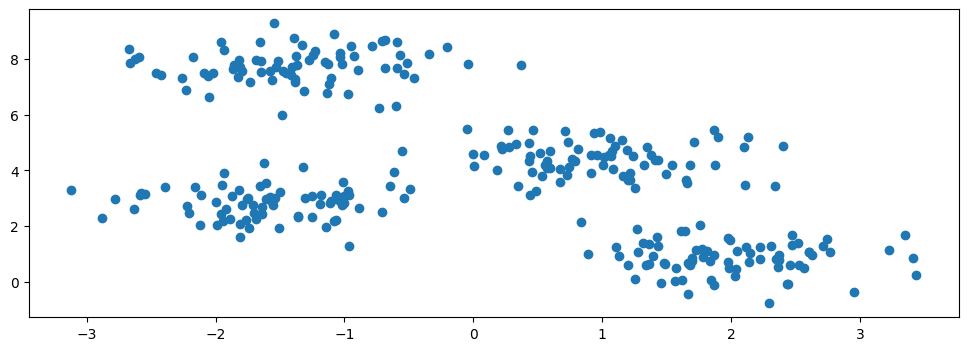

In [270]:
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,4))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 모델링

In [271]:
# k means 학습
model = KMeans(n_clusters= 2, n_init = 'auto')
model.fit(x)

# 예측
pred = model.predict(x)
print(pred)

[0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0]


In [272]:
# feature + pred + y 붙여 놓고 비교해 봅시다.
pred = pd.DataFrame(pred, columns = ['predicted'])
result = pd.concat([x, pred, y], axis = 1)
result.head()

,x1,x2,predicted,shape
0,0.836857,2.136359,0,1
1,-1.413658,7.409623,1,3
2,1.155213,5.099619,0,0
3,-1.018616,7.814915,1,3
4,1.271351,1.892542,0,1


### 결과 시각화

In [273]:
# k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])
centers

,x1,x2
0,0.452332,2.681056
1,-1.334654,7.694427


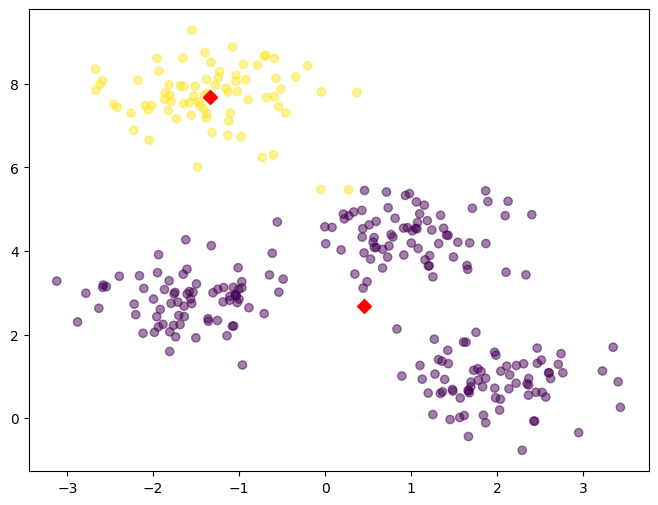

In [274]:
plt.figure(figsize = (8,6))
plt.scatter(result['x1'], result['x2'], c = result['predicted'], alpha=0.5)
plt.scatter(centers['x1'], centers['x2'], s=50, marker='D', c='r')
plt.show()

### k 값에 따라 모델을 생성하고 스래프 그리기

In [275]:
def k_means_plot(x, y, k) :
    # 모델 생성
    model = KMeans(n_clusters= k, n_init = 'auto')
    model.fit(x)
    pred = model.predict(x)

    # 군집 결과와 원본 데이터 합치기(concat)
    pred = pd.DataFrame(pred, columns = ['predicted'])
    result = pd.concat([x, pred, y], axis = 1)

    # 중앙(평균) 값 뽑기
    centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

    # 그래프 그리기
    plt.figure(figsize = (12,4))
    plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
    plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
    plt.grid()
    plt.show()

### 적절한 k찾기

`-` Inertia value :  군집화가 된 후에, 각 중심점에서 군집의 데이터 간의 거리를 합산한 값

In [276]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1, 10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x)
    inertias.append(model.inertia_)

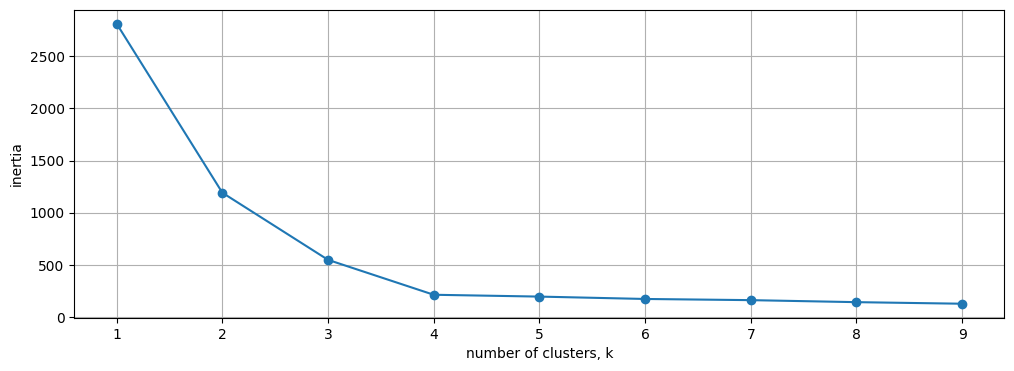

In [277]:
# Plot k vs inertias
plt.figure(figsize = (12, 4))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

`-` 난 4개의 군집이 좀 적절한 것 같음.

### kmeans의 한계

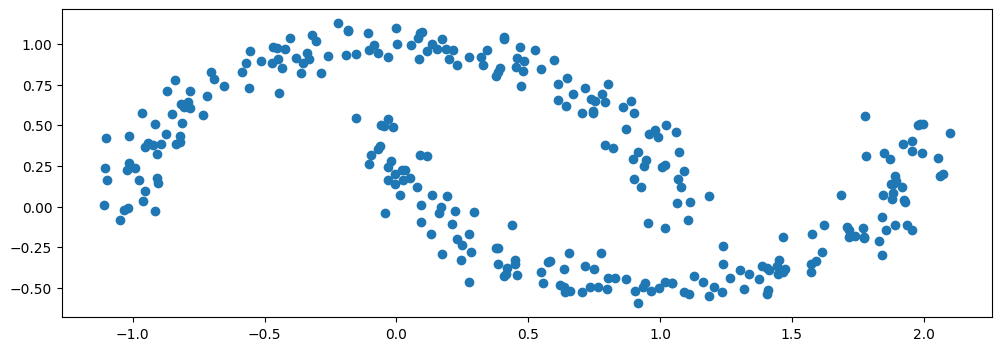

In [278]:
x, y = make_moons(n_samples = 300, noise = .08, random_state=2)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,4))
plt.scatter(x['x1'], x['x2'])
plt.show()

In [279]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1, 15)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x)
    inertias.append(model.inertia_)

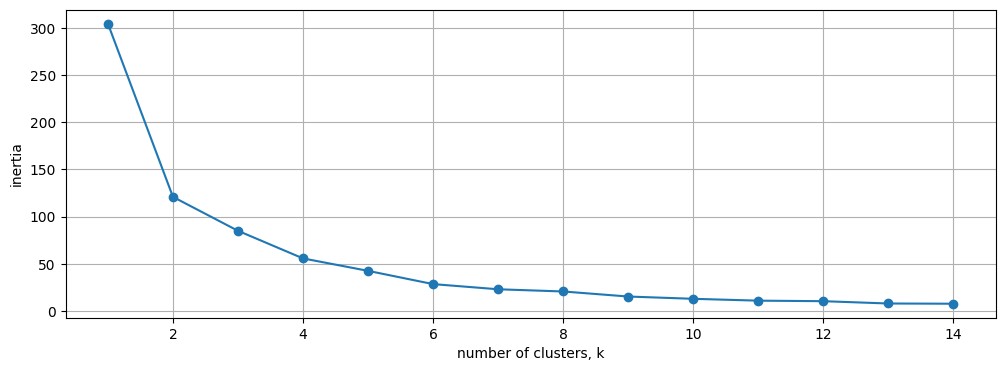

In [280]:
# Plot k vs inertias
plt.figure(figsize = (12,4))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

<Figure size 1200x400 with 0 Axes>

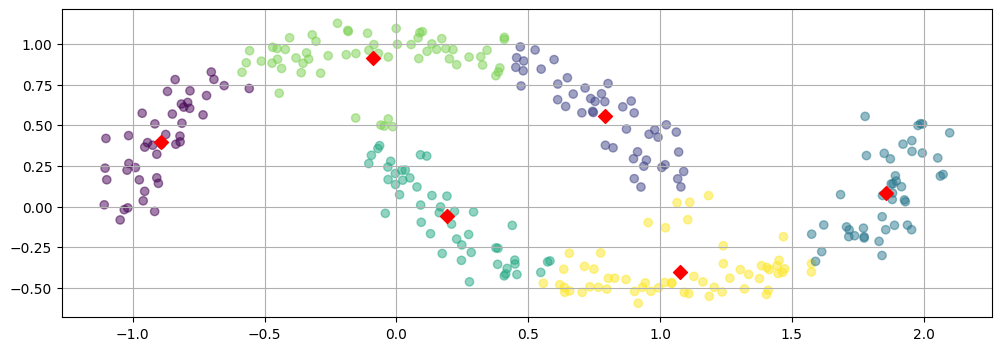

In [281]:
# 적절한 k값으로 모델을 생성해 봅시다.
plt.figure(figsize = (12,4))
k_means_plot(x, y, k = 6)

* 우리가 기대하는 모델이 생성되지는 앟는다.

* Kmeans는 **블록한(convex)** 덩어리 cluster 구분에서는 괜찮지만, 뭐야 근데 위에 잘 분류된거 아녀? 여튼 저런식에서는 잘 분류가 안된다는 것을 말하고 싶었음

***

## 2. DBSCAN

`-` DBSCAN모델은 위 kmeans의 한계점을 보완한 모델이다.

1. 임의의 한 점에서 시작

2.  `반경` 범위내에 최소 포인트 수가 존재하는지 확인

3. 존재한다면 각 포인트들을  중심으로 다시 원을 그어 `최소 포인트 수`를 확인

4. `2~3`을 반복 수행

5. 존재하지 않으면, 군집에 포함되지 않은 점으로 이동하여 `1~4` 반복 수행

6. 어느 군집에도 포함되지 않은점을 이상치로 간주

* DBSCAN의 주 매개변수
    * min_samples : 핵심 포인트를 중심점으로 간주하는 주변 지역의 표본 수
    * eps : 핵심 포인트를 중심으로 측정되는 유클리디언 거리값

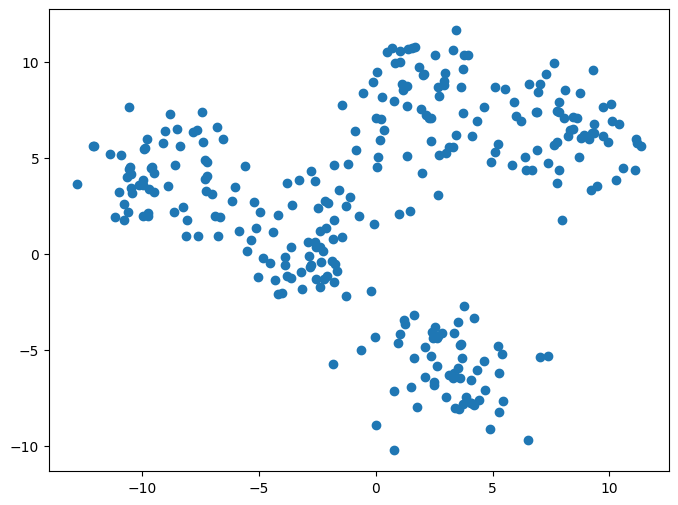

In [282]:
x, y = make_blobs(n_samples=300, centers=5, cluster_std=1.8, random_state=20)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (8,6))
plt.scatter(x['x1'], x['x2'])
plt.show()

In [283]:
# DBSCAN 모델을 만들어 봅시다.
model = DBSCAN(eps=0.1, min_samples=3)
model.fit(x)

DBSCAN(eps=0.1, min_samples=3)

In [284]:
# fitting한 후에 모델의 labels_ 값이 찾아낸 군집 종류입니다.
clusters = model.labels_

In [285]:
# 군집 번호 중 -1은 이상치를 의미합니다.(어느 군집에도 포함 안되는 값들!)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

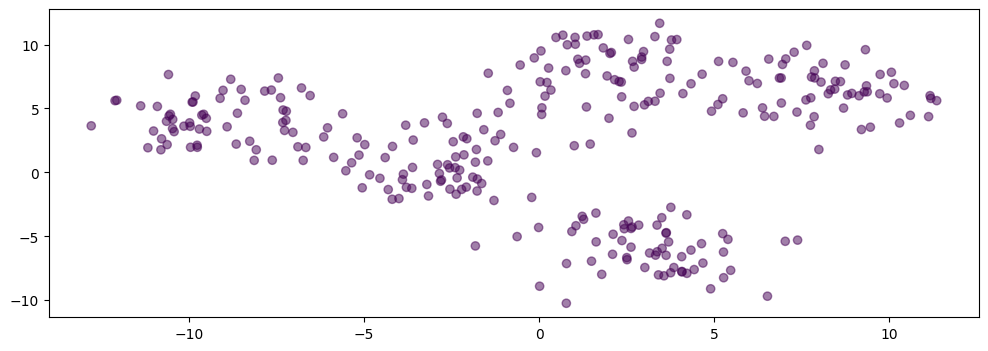

In [286]:
plt.figure(figsize = (12, 4))
plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
plt.show()

`-` eps를 적용하며 모델을 생성하고 그래프 그리기

In [287]:
def dbscan_plot(x, y, eps) :
    model = DBSCAN(eps=eps, min_samples=3)
    model.fit(x)
    clusters = model.labels_
    plt.figure(figsize = (12,4))
    plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
    plt.grid()
    plt.show()

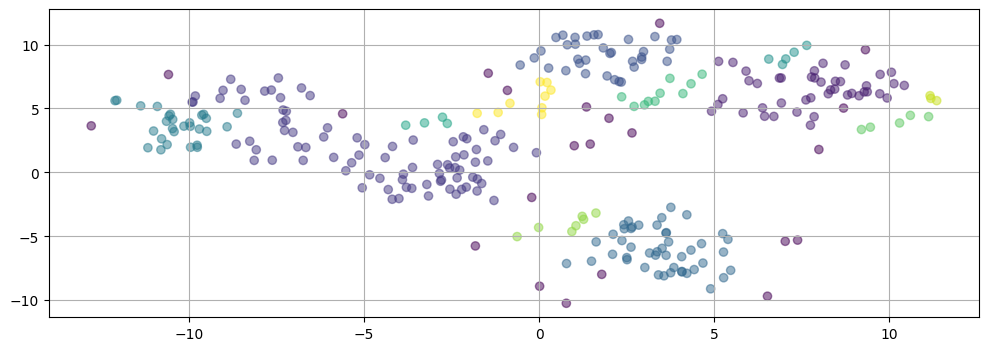

In [288]:
dbscan_plot(x,y,1.)

###  적절한 eps 찾기

* 역시 눈으로 보면서 찾는 것은 실전에서는 거의 불가능
* DBSCAN에도 적절한 값을 찾는 방법
    1. 모든 점과 가까운 n개와 평균 거리 계산
    2. 평균 거리순으로 정렬해서, 그래프 그리기
    3. 평균 거리가 급격히 커지기 시작하는 지점 찾기(elbow point)

* DBSCAN의 주 매개변수
* min_samples : 핵심 포인트를 중심점으로 간주하는 주변 지역의 표본 수
* eps : 핵심 포인트를 중심으로 측정되는 유클리디언 거리값

In [289]:
# 각점과 근처 3개 점과의 평균 거리
# NearestNeighbors은 거리계산할 때, 자기 자신을 포함하므로 n+1
n = 3
knnDist = NearestNeighbors(n_neighbors = n+1).fit(x)
distances, _ = knnDist.kneighbors(x)

`-` 열의 수가 4이다. $\to$ 0은 자기 자신을 의미하고 나머지 3개의 열은 가장 가까운 3개의 점과의 거리를 의미한다.

In [290]:
distances.shape

(300, 4)

In [291]:
distances[:5]

array([[0.        , 0.49231025, 0.55853535, 0.63526856],
       [0.        , 0.47383177, 1.47765296, 1.67802678],
       [0.        , 0.40879685, 0.43381656, 0.6280564 ],
       [0.        , 0.63087629, 0.72695518, 0.73171997],
       [0.        , 0.35638603, 0.3886451 , 0.53734417]])

`-` 평균 거리 계산

In [292]:
dist = np.mean(distances[:,1:],axis=1)
dist = np.sqrt(dist)

`-` 급격ㅎ; 갈;기 증가하기 시작하는 구간을 찾아 eps값 적용

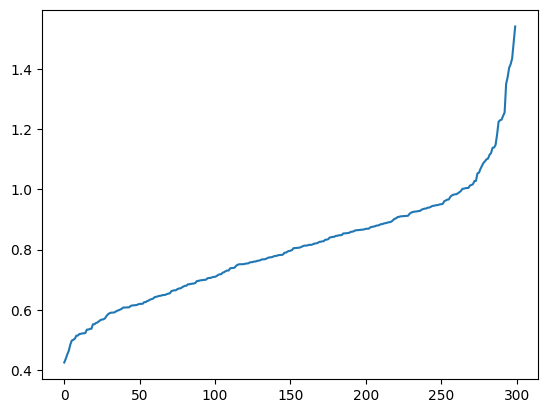

In [293]:
plt.plot(np.sort(dist))

`-` 여기서 보니 1.0때가 거리가 급격히 증가하는 것 같다.

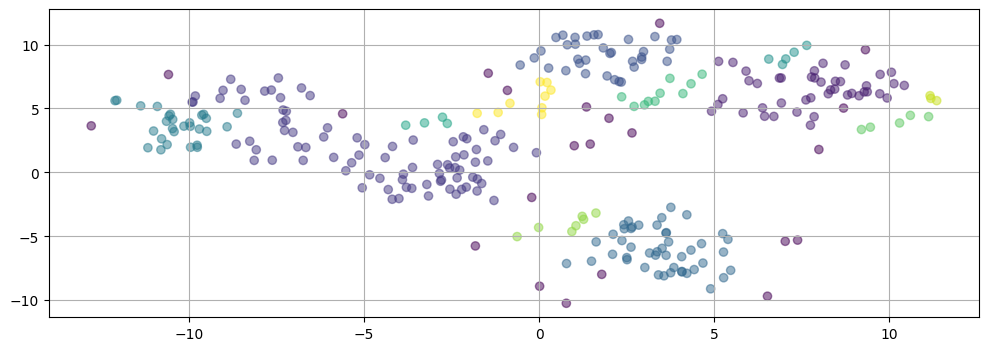

In [294]:
dbscan_plot(x, y, eps = 1.0 )

## 3. 실습

### (1) 데이터 로드

In [295]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/customer_segmentation.csv'
data = pd.read_csv(path)
data.head()

,CustID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### (2) 데이터 전처리

In [296]:
# 군집화는 아래 변수들만 사용합니다.
x = data.loc[:, ['Age', 'Income', 'Score']]

In [297]:
x.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### (3) 스케일링

In [298]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

### (4) 클러스터링

In [299]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1, 10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x)
    inertias.append(model.inertia_)

`-` 적절한 군집의 개수는 5개로 추정된다.

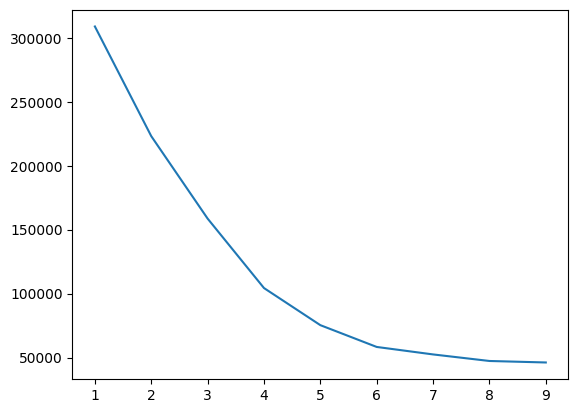

In [300]:
plt.plot(kvalues, inertias)

In [301]:
# k means 학습
model = KMeans(n_clusters= 5, n_init = 'auto')
model.fit(x)

# 예측
pred = model.predict(x)
print(pred)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


### (5) 데이터 군집 결과 정리

In [302]:
data["pred"] = pred

In [303]:
data.head()

,CustID,Gender,Age,Income,Score,pred
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


### (6) 군집별 변수 비교

In [310]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

`1` Age

In [311]:
#| code-fold : true
fig = data.plot(x="Age", kind ="hist",
                 backend = "plotly",color="pred",nbins=50,
                facet_col = "pred",
                facet_col_wrap = 3,title = "Age")

fig.update_layout(
    title={
        'text': "distribution of Age",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

`2` Income

In [312]:
#| code-fold : true
fig = data.plot(x="Income", kind ="hist",
                 backend = "plotly",color="pred",nbins=50,
                facet_col = "pred",
                facet_col_wrap = 3,title = "Age")

fig.update_layout(
    title={
        'text': "distribution of Income",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [313]:
#| code-fold : true
fig = data.plot(x="Score", kind ="hist",
                 backend = "plotly",color="pred",nbins=50,
                facet_col = "pred",
                facet_col_wrap = 3,title = "Age")

fig.update_layout(
    title={
        'text': "distribution of Score",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()